# 15 상관분석

## 상관분석
* 두 변수 x, y가 있을때 두 변수가 서로 어떤 관계에 있는지 분석하는 과정
* 보통 2개의 등간/비율 척도 변수를 분석할때 우선적으로 산점도를 그려 <br>
  변수간의 관계를 시각화 한 후 상관계수를 계산

## 상관분석의 예
* 키x가 클수록 몸무게y도 증가하는가?
* 교육을 많이 받으면 수입도 증가하는가?
* 광고를 많이 하면 판매량이 증가하는가?
* 운동을 많이 하면 몸무게는 감소하는가?
* 담배를 줄이면 심혈관 질병 발생비율은 낮아지는가?

## 두 변수 정의 : 독립변수, 종속변수
* 독립변수 : 종속변수를 추정하거나 예측하는데 토대를 제공 (원인/설명 변수)
* 종속변수 : 예측되거나 추정되는 변수 <br>
               독립변수의 특정값에 대한 결과를 의미 (결과/반응 변수)
* 독립변수와 종속변수는 인과관계를 가질 가능성이 높음 (원인-결과 관계)<br>
  => 즉, 변수 X가 다른 변수 Y에 영향을 주는 관계를 의미

In [1]:
# A회사의 광고비 지출이 매출에 어느정도 영향을 주는지 파악하기 위해 광고비와 매출액간의 관계를 조사해 봄
# 광고비와 매출액간의 연관성 파악을 위해 산포도로 시각화해 보세요
ad <- c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales <- c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

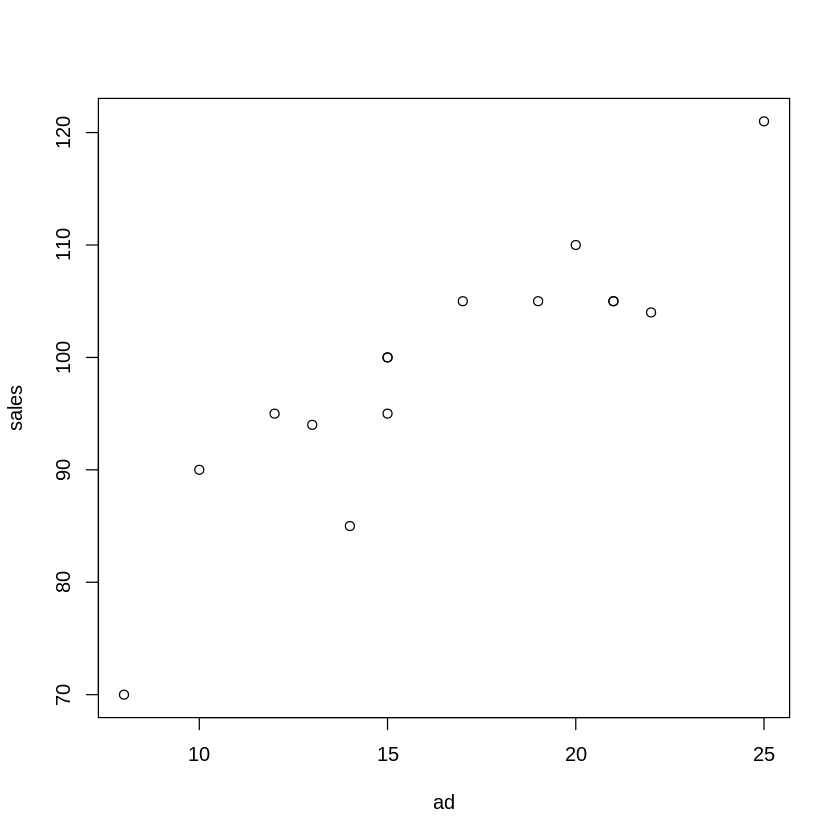

In [2]:
plot(ad, sales)

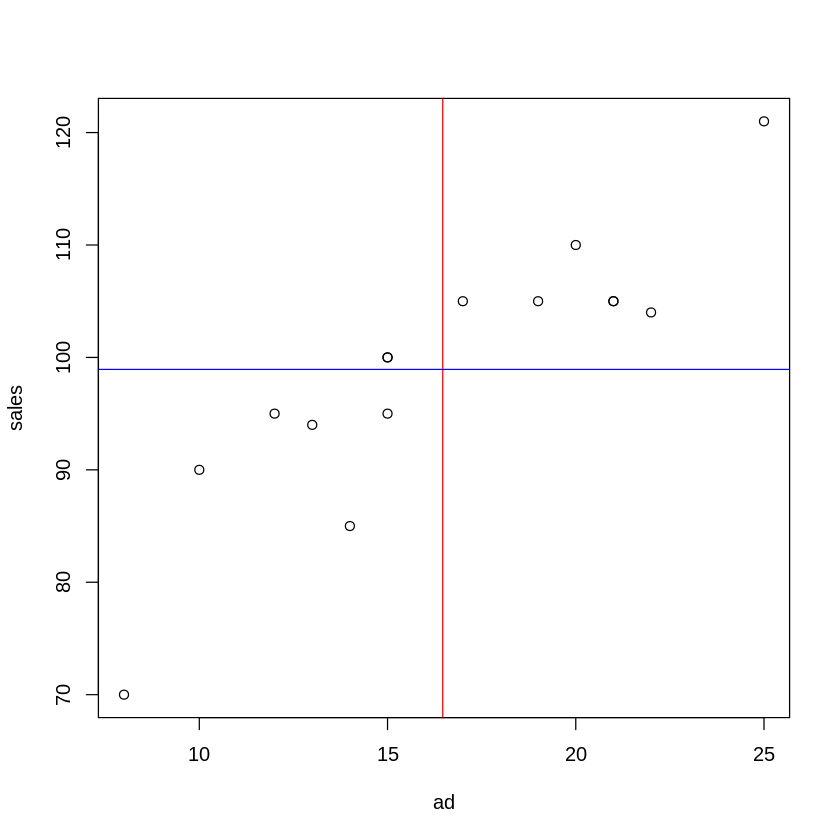

In [3]:
# 독립변수와 종속변수 변화간의 관계 파악
plot(ad, sales)
abline(v=mean(ad), col='red')     # 수직선v 긋기
abline(h=mean(sales), col='blue') # 수직선h 긋기

In [4]:
# 광고비와 매출액의 산점도에서 보듯 2, 4사분면에 분포되어 있으므로
# 독립 /종속 변수의 관계는 비례임 - 상관관계가 있음

In [5]:
# applewood 자동차판매 데이터를 기초로
# 구매자 연령과 판매이익간의 상관관계를 파악해보세요

In [6]:
aw = read.csv('csv/applewood.txt', sep=' ')
head(aw)

,Age,Profit,Location,Vehicle.Type,Previous
,<int>,<fct>,<fct>,<fct>,<int>
1,21,"$1,387",Tionesta,Sedan,0
2,23,"1,754",Sheffield,SUV,1
3,24,"1,817",Sheffield,Hybrid,1
4,25,"1,040",Sheffield,Compact,0
5,26,"1,273",Kane,Sedan,1
6,27,"1,529",Sheffield,Sedan,1


In [7]:
age <- aw$Age
profit <- as.character(aw$Profit)
head(profit)   # $기호와 컴마가 잇어서 숫자로 변환x

[1] "$1,387" "1,754"  "1,817"  "1,040"  "1,273"  "1,529"

In [8]:
# 문자교체 : gsub('찾을문자', '바꿀문자', 객체)
profit <- gsub(',', '', profit)
profit <- gsub('\\$', '', profit)
profit <- as.integer(profit)
head(profit)

[1] 1387 1754 1817 1040 1273 1529

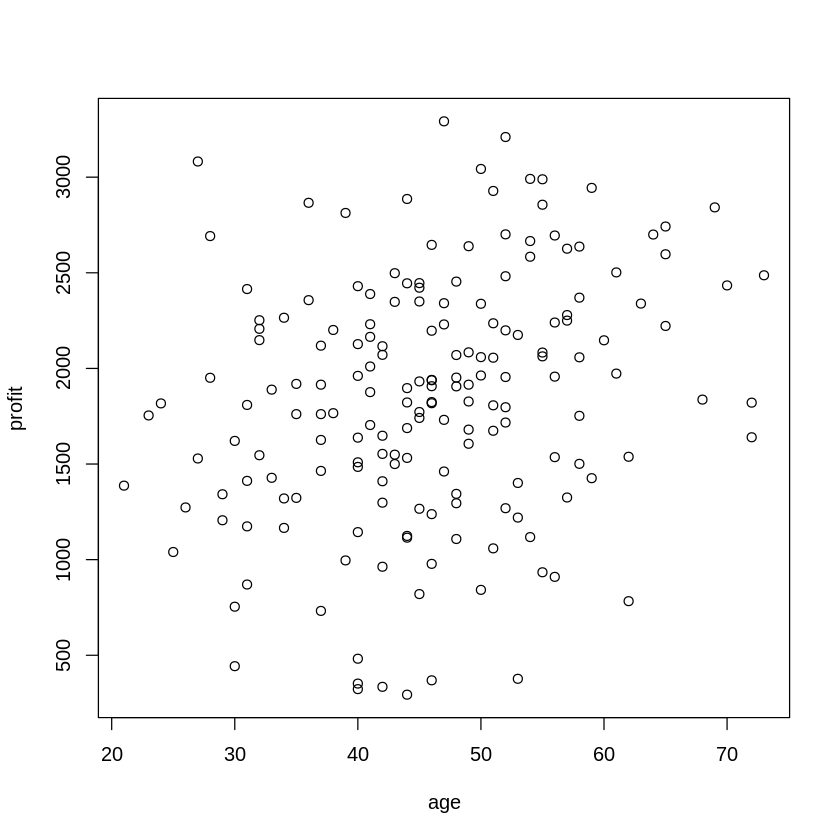

In [9]:
plot(age, profit)

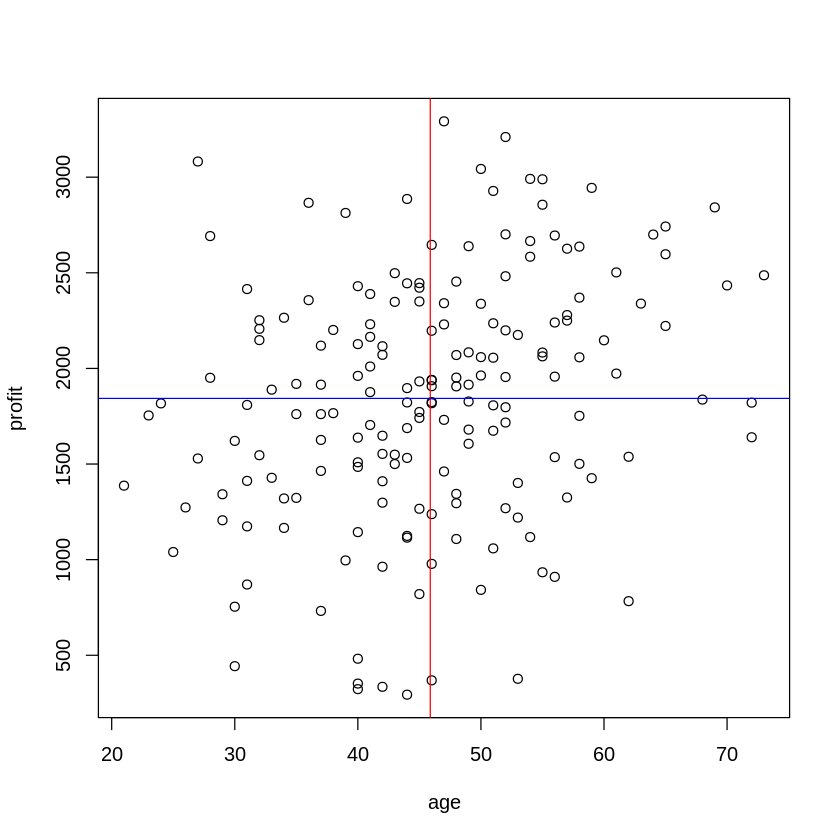

In [10]:
plot(age, profit)
abline(v=mean(age), col='red')
abline(h=mean(profit), col='blue')

In [11]:
# 구매자 나이와 판매이익의 산점도에서 보듯 점들이 모든 사분면에 분포되어 있으므로
# 독립 /종속 변수의 관계를 명확하게 규정하기 어려움 - 상관관계가 보이지 않음

## 상관관계correlation

* 두 변수 사이에 서로 주고 받는 관계가 있음 <br>
   => 선형관계 여부와 연관성이 존재
* 양/음의 상관관계, 무 상관관계등 3가지 존재 <br>
   => 각 변수의 관계를 기울기에 따라 양/음의 상관계수로 분류함
* 상관관계를 나타내는 정도를 상관계수라 하는데 <br>
  강력하게 관계가 나타나기도 하지만 아리까리하게 있는듯 없는 듯한 관계도 있을수 있음
* 이러한 차이를 명확하게 하기 위해 상관계수를 사용
    + 주로 피어슨 상관계수를 활용함
* R에서는 cor 함수를 사용

## 공분산covariance
* 두 변수가 각 평균으로부터 떨어져 있는 정도를 구한 후 표본의 갯수로 나누어 계산한 것
* 공분산에서는 x와 y의 편차들을 서로 곱해주는데, <br>
  그 이유는 두 변수간의 관계가 편차들의 곱에 반영이 되기 때문. <br>
* 하나의 x값이 평균보다 클 때 y도 평균보다 크면 두 편차의 곱은 양수.
* 반면 한 x값이 평균보다 클 때 y는 평균보다 작으면 편차의 곱으은 음수가 되는 점을 이용한 것.
* 곱한 값들을 모두 더해 양의 관계가 우세한지 음의 관계가 우세한지 측정.
* 결과가 양수 또는 음수로 나올수 있음
    + 양수 -> 양의 상관관계 있음 (x증가->y증가)
    + 음수 -> 음의 상관관계 있음 (x증가->y감소)
* R에서는 cov 함수를 사용

In [12]:
# 광고비와 매출액간의 상관계수와 공분산 계산
cor(ad, sales)   # 0.89 (-1 ~ 1)

[1] 0.8879209

In [13]:
cov(ad,sales)   # 50.24

[1] 50.24762

## 상관계수 vs 공분산
* 두 변수가 함께 변하는 정도를 -1~1 범위의 수치로 나타낸 것
* 단위로 인한 공분산의 차이를 어느 정도 보완해 줌
* 일반적으로 칼피어슨이 개발한 피어슨 상관계수를 사용함
* 상관계수 범위에 따른 상관정도 해석
    + -1.0 ~ -0.7 : 매우 강한 음의 상관관계 있음
    + -0.7 ~ -0.3 : 강한 음의 상관관계 있음
    + -0.3 ~ -0.1 : 약한 음의 상관관계 있음
    + -0.1 ~ 0.1 : 상관관계 없음
    + 0.3 ~ 0.1 : 약한 양의 상관관계 있음
    + 0.7 ~ 0.3 : 강한 양의 상관관계 있음
    + 1.0 ~ 0.7 : 매우 강한 양의 상관관계 있음

In [14]:
# 놀이동산parks 데이터를 이용해서 놀이기구 rides와 전체 만족도 overall의 상관관계를 분석하시오
parks <- read.csv('csv/parks-cor.csv')
head(parks)

,weekend,num.child,distance,rides,games,wait,clean,overall
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,yes,0,114.64826,87,73,60,89,47
2,yes,2,27.01410,87,78,76,87,65
3,no,1,63.30098,85,80,70,88,61
4,yes,0,25.90993,88,72,66,89,37
5,no,4,54.71831,84,87,74,87,68
6,no,5,22.67934,81,79,48,79,27


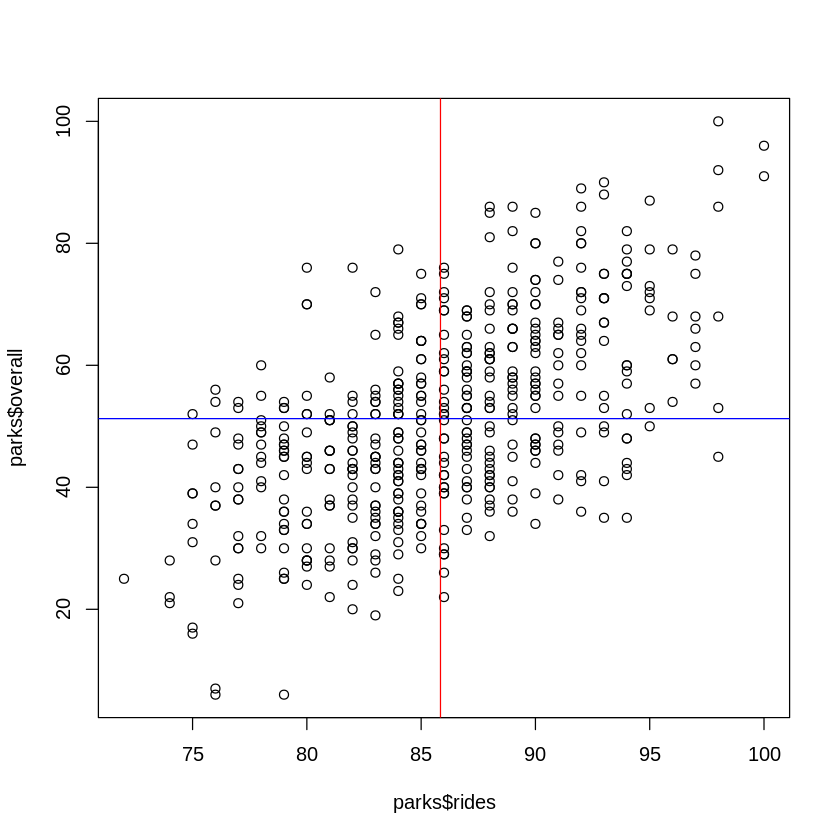

In [15]:
plot(parks$rides, parks$overall)
abline(v=mean(parks$rides), col='red')
abline(h=mean(parks$overall), col='blue')

In [16]:
cov(parks$rides, parks$overall)

[1] 50.82939

In [17]:
cor(parks$rides, parks$overall)

[1] 0.5859863

## 상관계수 행렬과 히트맵
* 보통 다수의 변수간의 상관계수를 구할때는 일일히 계산하지 않고 상관계수 행렬을 사용함
* 하지만, 많은 변수들간의 상관계수를 표로 나타내기엔 가독성이 좋지 않음
* 히트맵이라는 시각화도구를 사용하면 상관계수와 상관정도를 <br>
  색상으로 표현하기 때문에 가독성과 이해도가 좋아짐
* R에서는 corrplot 함수를 이용 

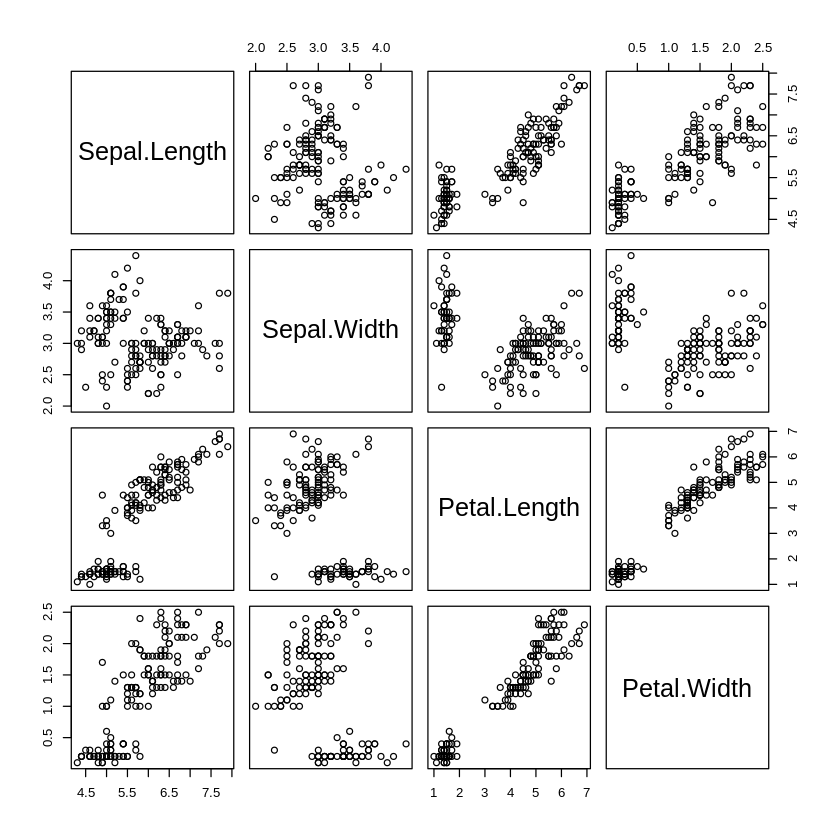

In [18]:
# iris 데이터셋의 변수들에 대한 상관행렬을 그려보세요 
plot(iris[, 1:4])   # 산점도 행렬

In [19]:
cor(iris[, 1:4])   # 상관계수 행렬

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [20]:
# install.packages('corrplot')

In [21]:
library(corrplot)

corrplot 0.92 loaded



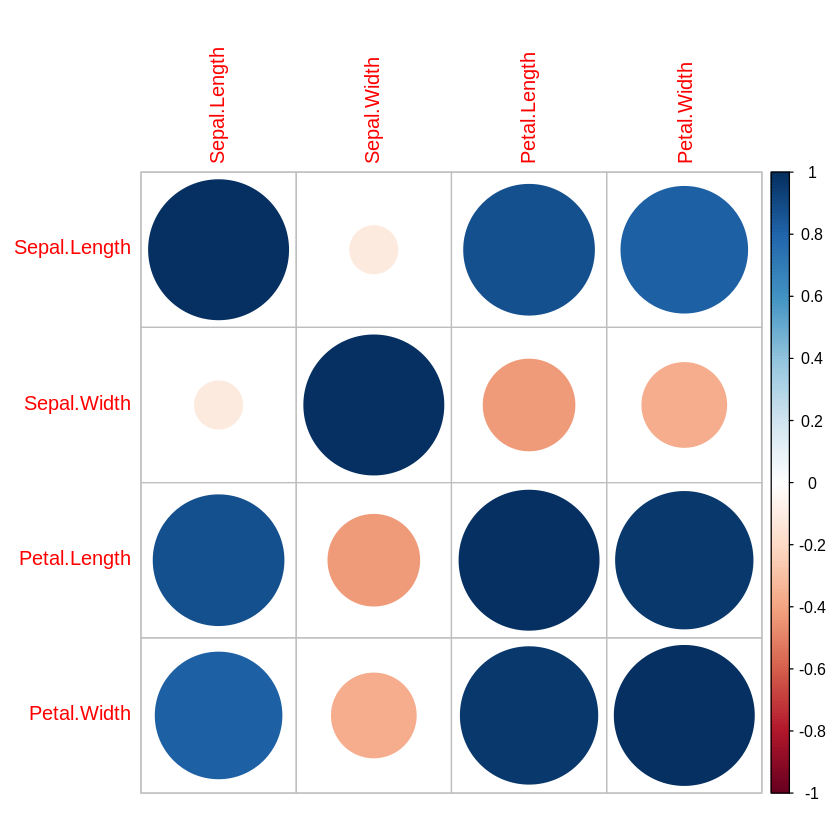

In [22]:
cor <- cor(iris[, 1:4])
corrplot(cor)

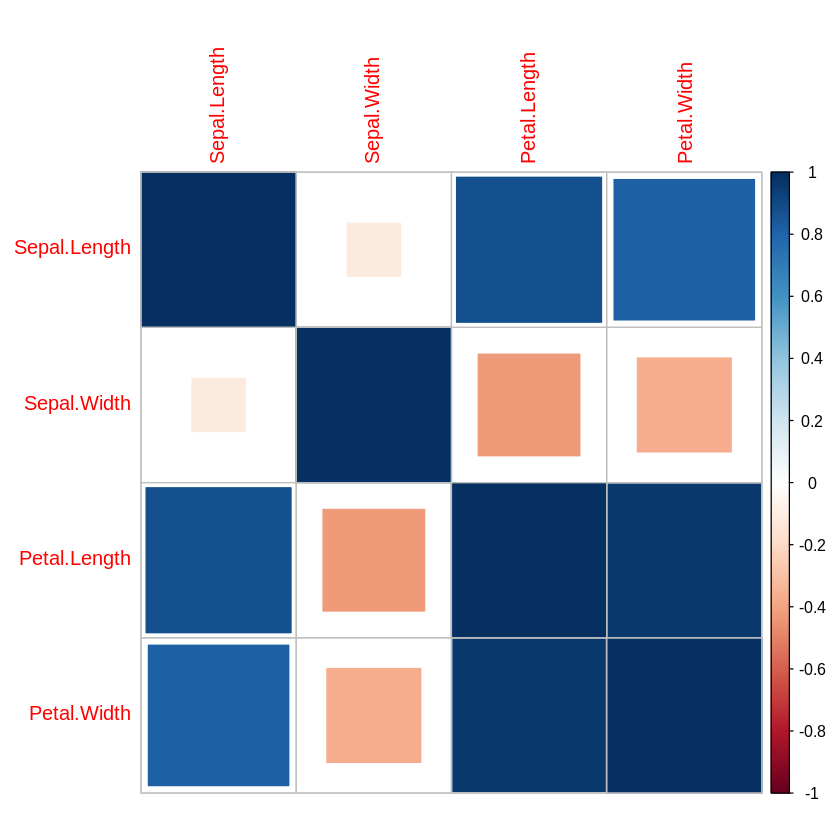

In [23]:
# 상관관계를 도형으로 표시
corrplot(cor, method='square')

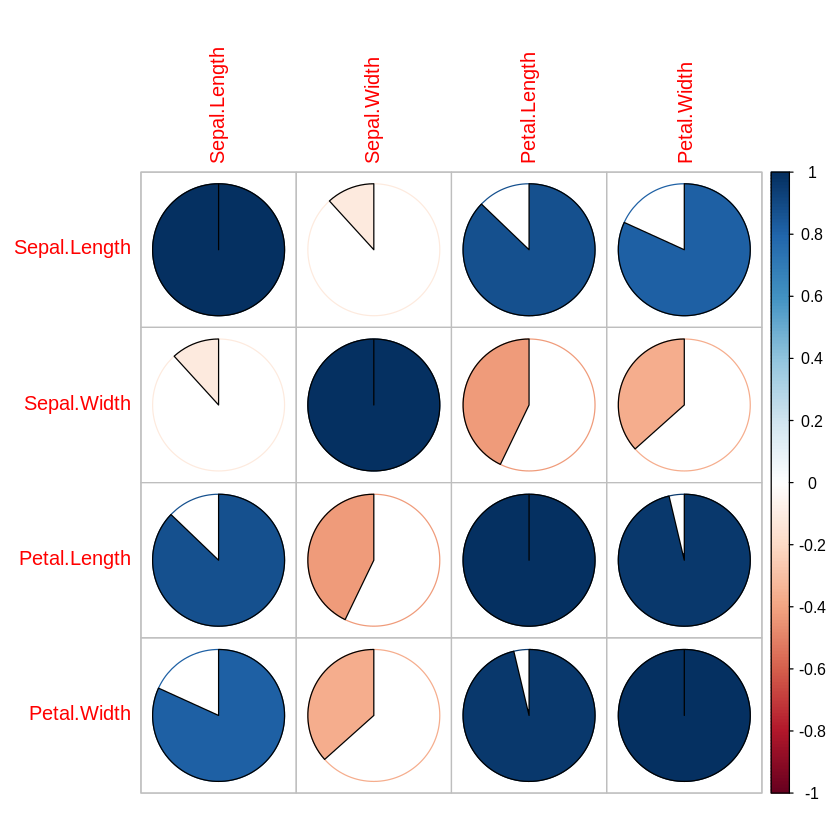

In [24]:
corrplot(cor, method='pie')

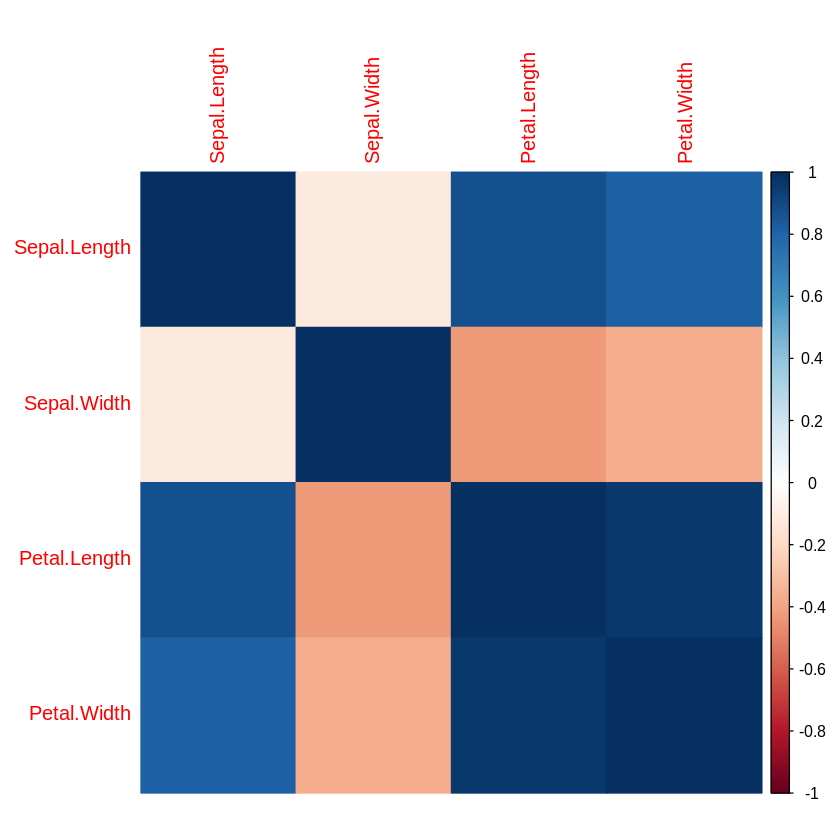

In [25]:
corrplot(cor, method='color')

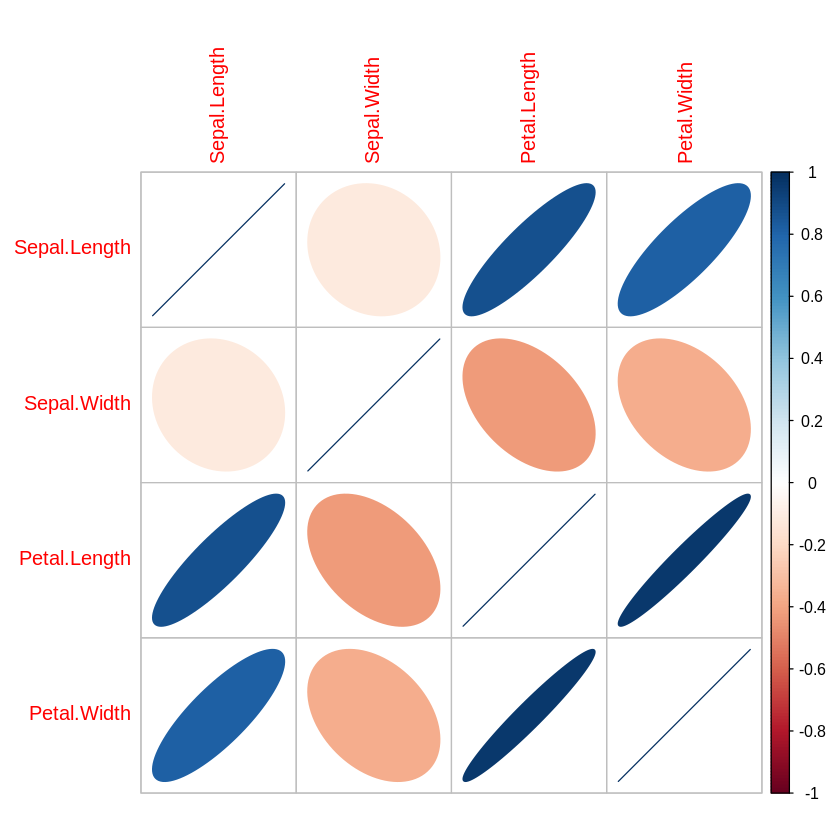

In [26]:
corrplot(cor, method='ellipse')   # 추천!

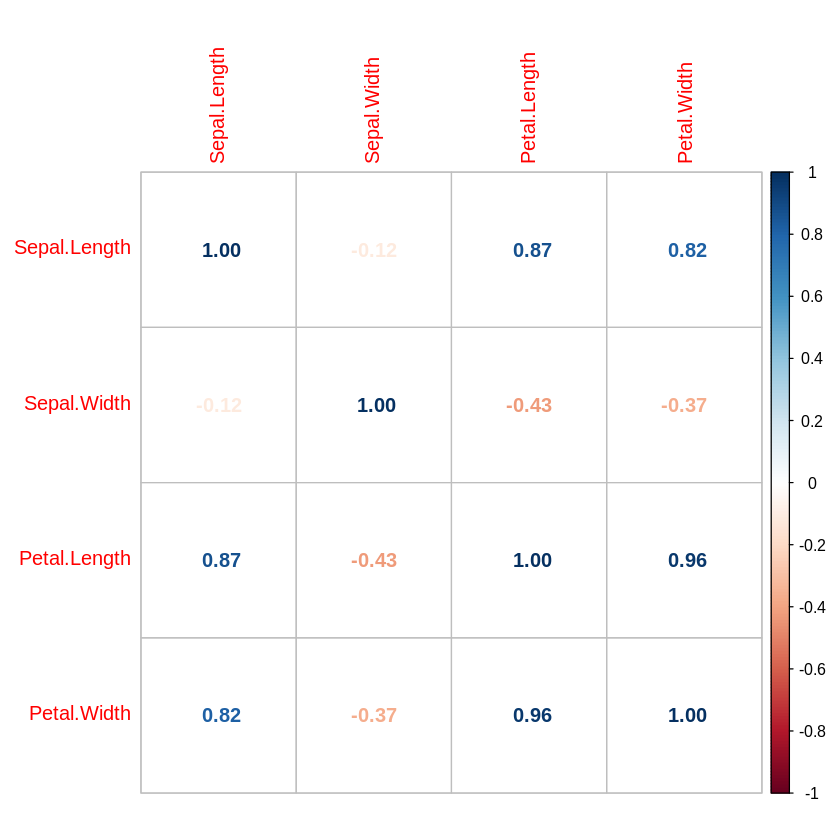

In [27]:
corrplot(cor, method='number')

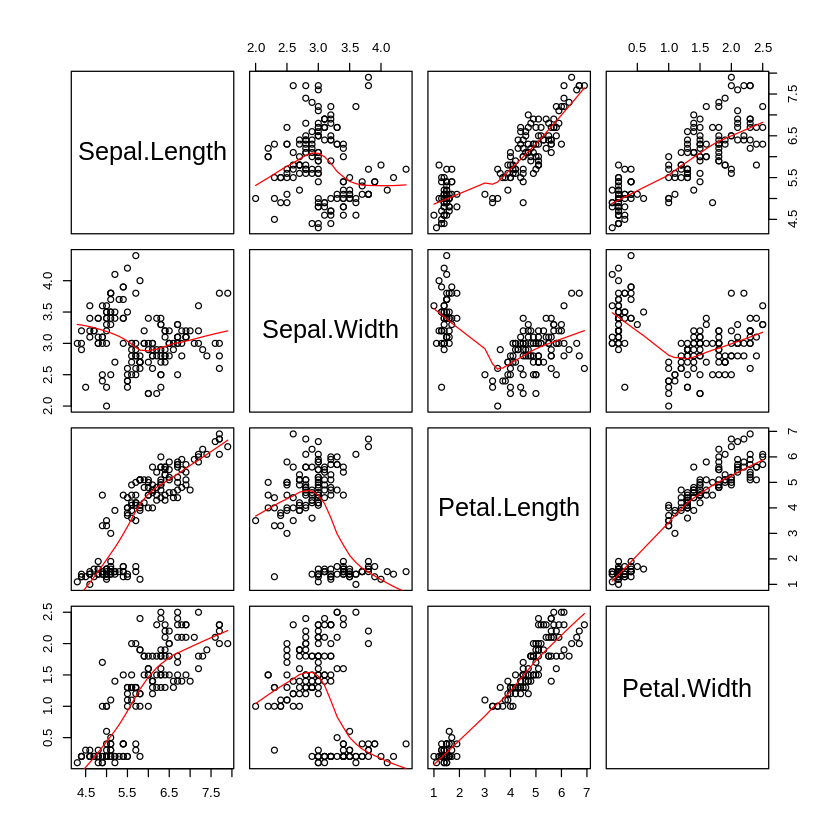

In [28]:
# 산점도 행렬보다 좀 더 세련된 형태의 그래프 행렬 표시
# 추세선으로 상관관계를 쉽게 파악가능
# R에서 pairs 함수 사용
pairs(iris[, 1:4], panel=panel.smooth)

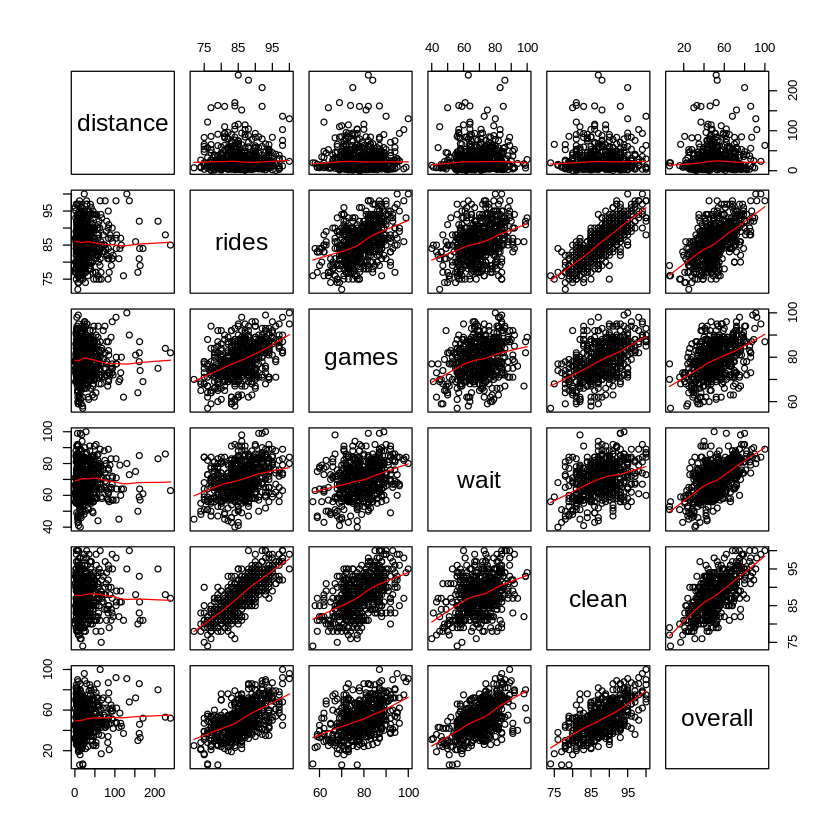

In [29]:
# 놀이동산parks 데이터에 상관행렬과 산점도 행렬을 나타내 보세요
pairs(parks[, 3:8], panel=panel.smooth)

In [30]:
cor <- cor(parks[, 3:8])
cor

,distance,rides,games,wait,clean,overall
distance,1.000000000,-0.009525919,-0.006502585,-0.007391617,0.003968523,0.08712602
rides,-0.009525919,1.000000000,0.455185111,0.314199509,0.789565053,0.58598628
games,-0.006502585,0.455185111,1.000000000,0.299104980,0.516979874,0.43746787
wait,-0.007391617,0.314199509,0.299104980,1.000000000,0.367884670,0.57262166
clean,0.003968523,0.789565053,0.516979874,0.367884670,1.000000000,0.63939818
overall,0.087126019,0.585986282,0.437467872,0.572621659,0.639398176,1.00000000


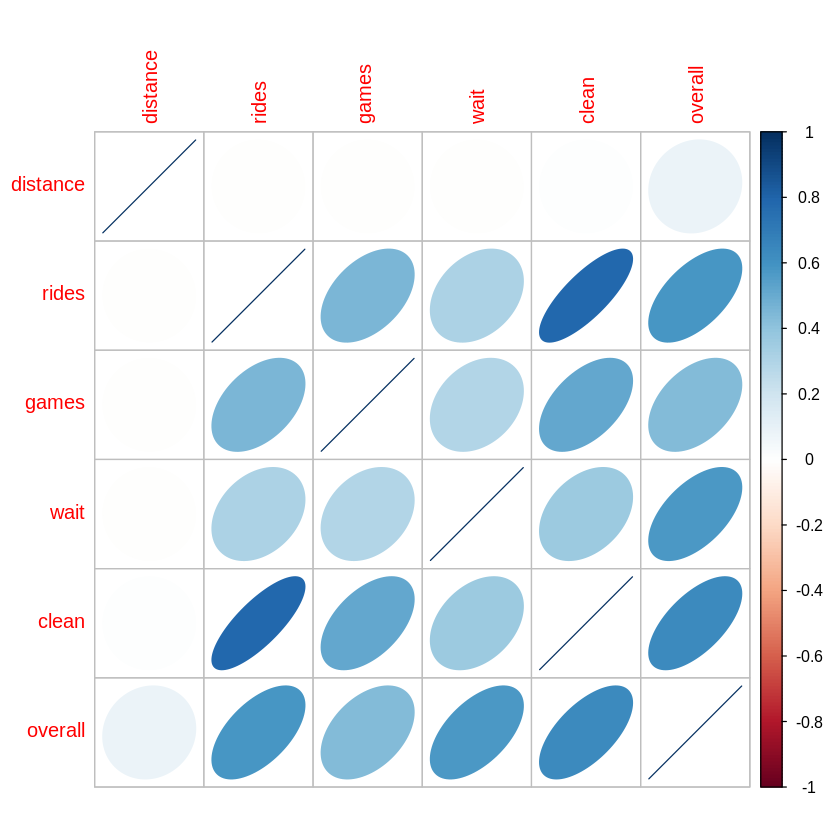

In [31]:
corrplot(cor, method='ellipse')

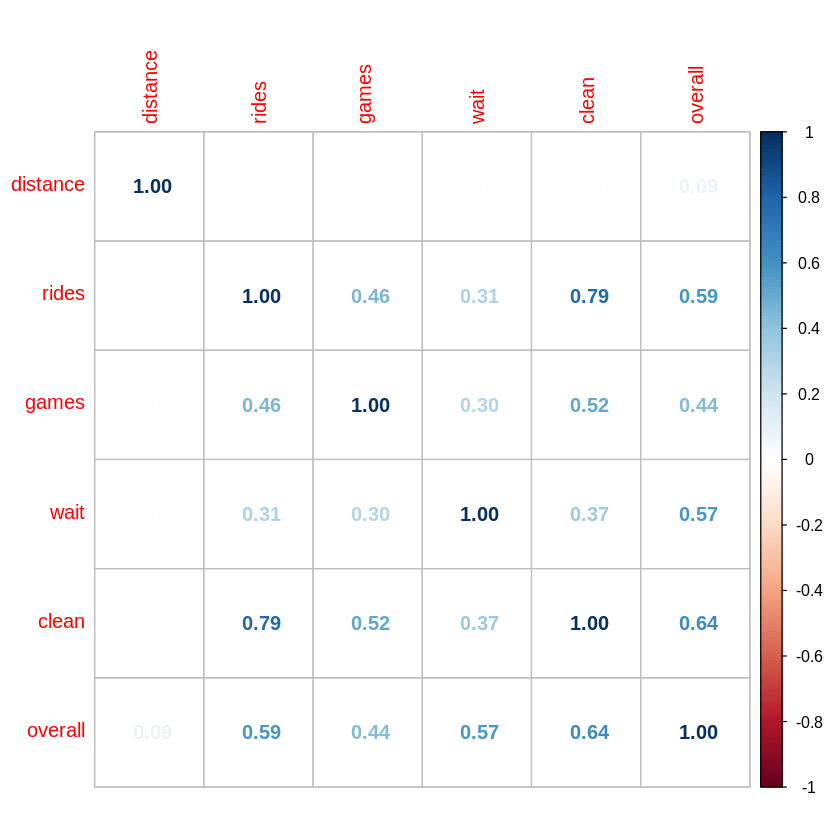

In [32]:
corrplot(cor, method='number')

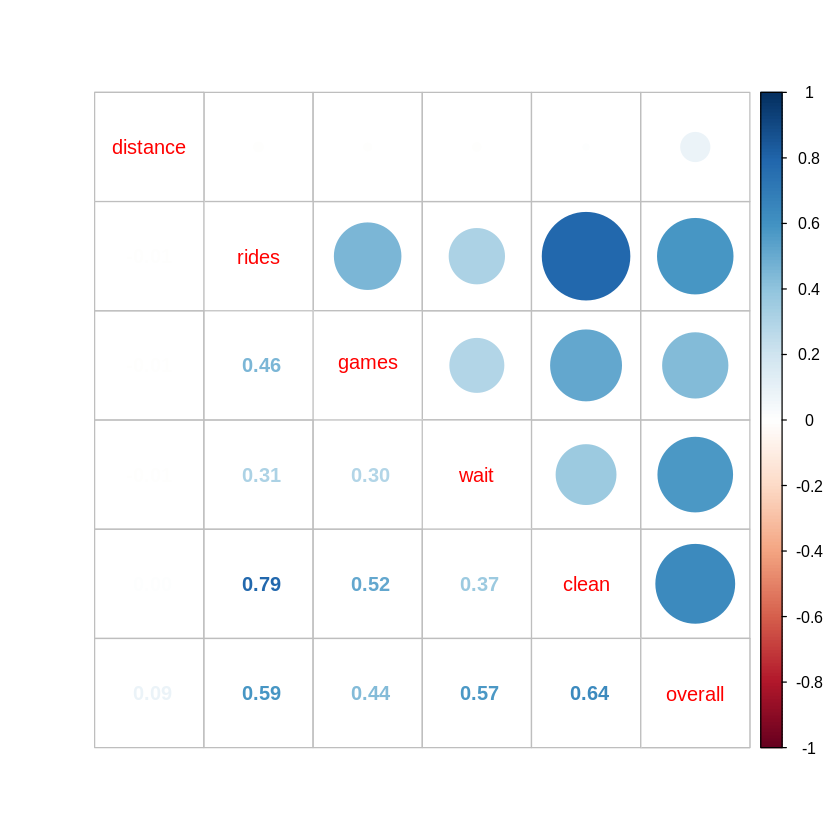

In [33]:
# corrplot 함수의 시각화를 혼합하려면 mixed 함수를 사용
corrplot.mixed(cor)

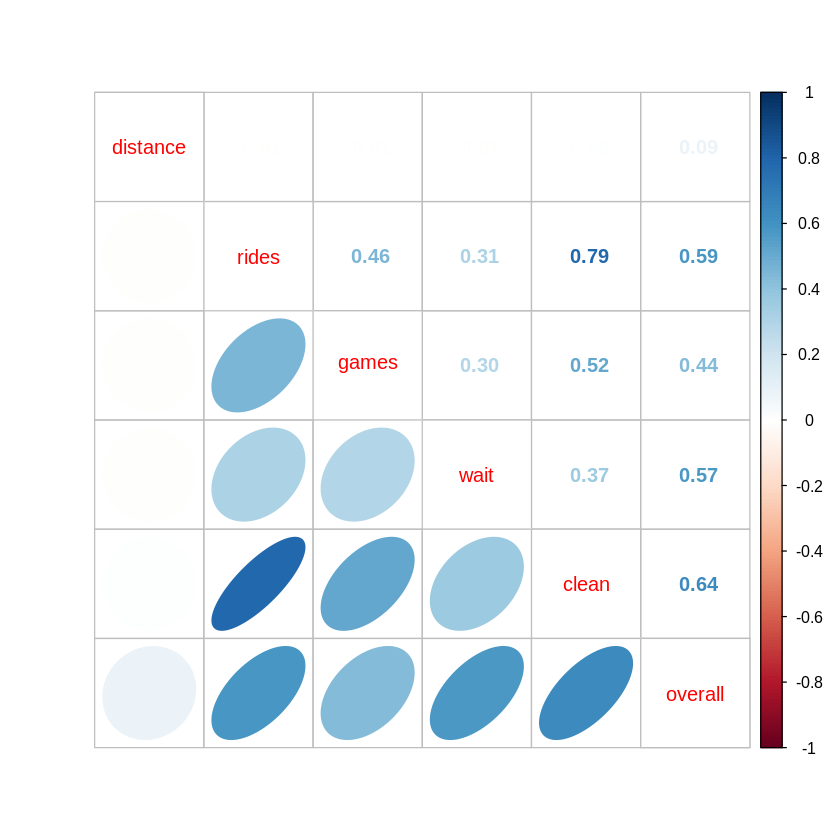

In [34]:
corrplot.mixed(cor, upper='number', lower='ellipse')

## 상관계수 유의성 검점
* 광고 횟수와 매출액이 서로 관련없는데 상관계수가 양으로 나온것은 아닐까?
* 유의수준 0.05를 기준으로 가설검정 실시
* 상관계수의 검정통계량은 t분포를 이용
    + 귀무가설 : 상관계수는 0이다 (연관성 없음)
    + 대립가설 : 상관계수는 0이 아니다 (연관성 있음)
* R에서는 cor.test 함수를 이용함

In [35]:
# 광고 횟수와 매출액간의 상관계수 유의성을 알아봄
options(scipen=100)
cor.test(ad, sales)


	Pearson's product-moment correlation

data:  ad and sales
t = 6.9597, df = 13, p-value = 0.000009921
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6890898 0.9624256
sample estimates:
      cor 
0.8879209 


In [36]:
# 놀이동산parks 데이터를 이용해서 놀이기구rides와 전체 만족도overall의 상관계수 유의성을 알아봄

In [37]:
# MASS 패키지의 Cars93 데이터셋을 이용해서
# 자동차의 각 요소와 연비mpg간의 상관관계를 분석하세요
# (가격, 배기량, 마력, 중량, RPM)

In [38]:
library(MASS)
?Cars93

Cars93 {MASS},R Documentation


In [39]:
head(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


In [40]:
# MPG.city / MPG.highway <=> Price, EngineSize, Horsepower, Weight, RPM

In [41]:
mpg1 <- Cars93[, c(5,12,13,25,14, 7)]
head(mpg1)

,Price,EngineSize,Horsepower,Weight,RPM,MPG.city
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,15.9,1.8,140,2705,6300,25
2,33.9,3.2,200,3560,5500,18
3,29.1,2.8,172,3375,5500,20
4,37.7,2.8,172,3405,5500,19
5,30.0,3.5,208,3640,5700,22
6,15.7,2.2,110,2880,5200,22


In [42]:
mpg2 <- Cars93[, c(5,12,13,25,14, 8)]
head(mpg2)

,Price,EngineSize,Horsepower,Weight,RPM,MPG.highway
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,15.9,1.8,140,2705,6300,31
2,33.9,3.2,200,3560,5500,25
3,29.1,2.8,172,3375,5500,26
4,37.7,2.8,172,3405,5500,26
5,30.0,3.5,208,3640,5700,30
6,15.7,2.2,110,2880,5200,31


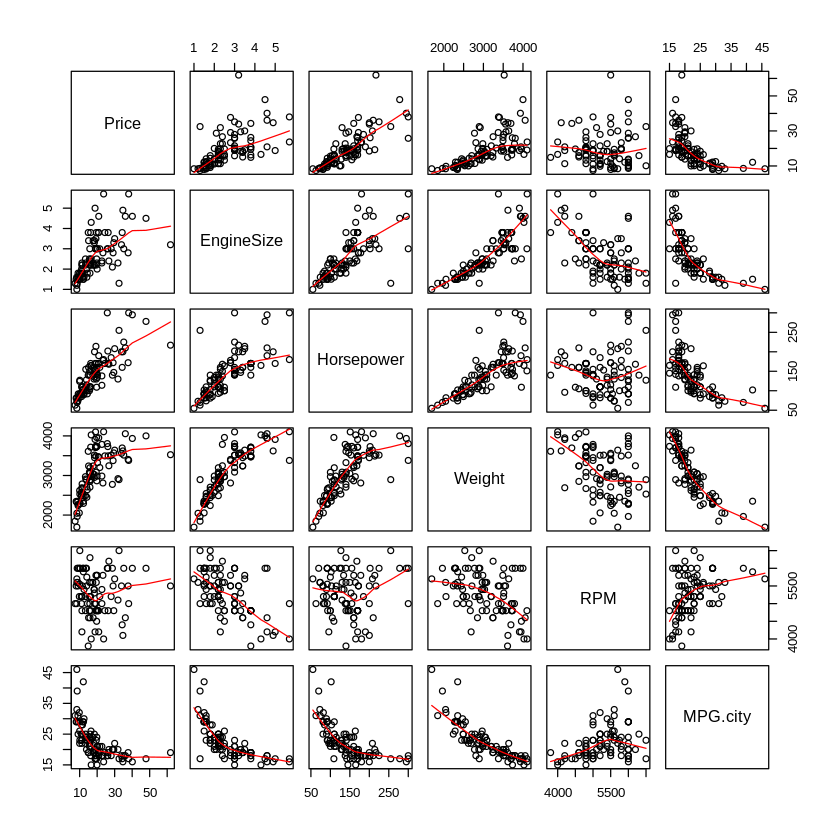

In [43]:
pairs(mpg1, panel=panel.smooth)

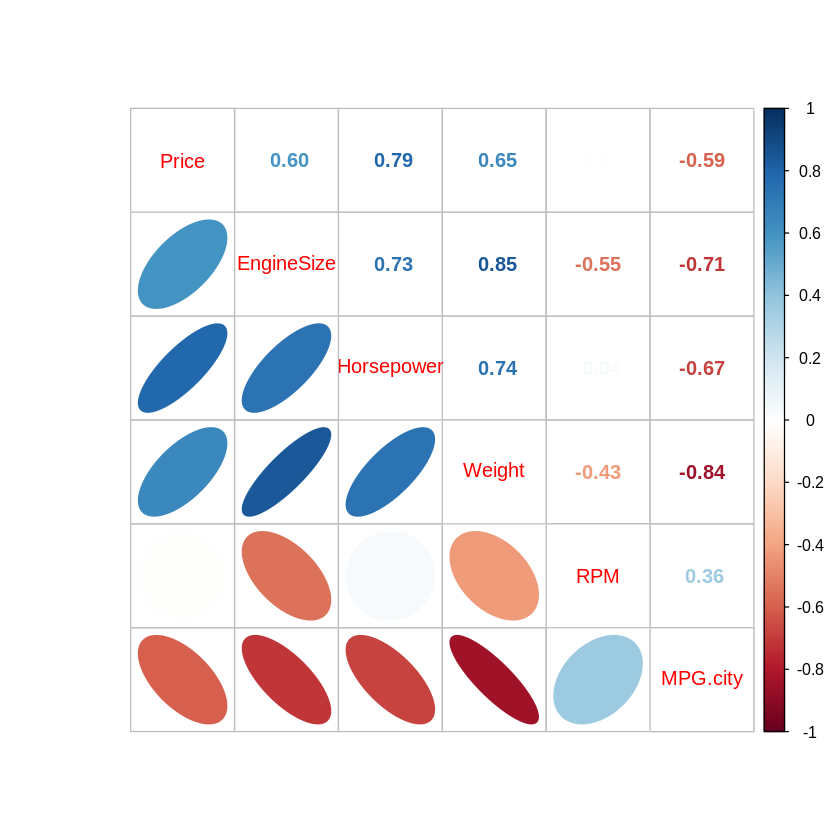

In [44]:
cor <- cor(mpg1)
corrplot.mixed(cor, upper='number', lower='ellipse')
# 연비와 관련있는 변수는 차량중량, 엔진크기임

In [45]:
cor.test(mpg1$MPG.city, mpg1$Weight)


	Pearson's product-moment correlation

data:  mpg1$MPG.city and mpg1$Weight
t = -14.958, df = 91, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8934013 -0.7720297
sample estimates:
       cor 
-0.8431385 


In [46]:
cor.test(mpg1$MPG.city, mpg1$EngineSize)


	Pearson's product-moment correlation

data:  mpg1$MPG.city and mpg1$EngineSize
t = -9.618, df = 91, p-value = 0.000000000000001606
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7982568 -0.5919041
sample estimates:
       cor 
-0.7100032 
